<a href="https://colab.research.google.com/github/NavyaPatil1011/Deep_learning_and_gen_ai_lab/blob/main/Week_5_Building_a_CNN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week - 5  Building a CNN for Image Classification

Design and implement a CNN model (with 4+ layers of convolutions) to classify multi category image datasets. Use the concept of regularization and dropout while designing the CNN model.

Use CIFAR-10 dataset.

Record the Training accuracy and Test accuracy corresponding to the following architectures:

       a. Base Model

       b. Model with L1 Regularization

       c. Model with L2 Regularization

       d. Model with Dropout

       e. Model with both L2 (or L1) and Dropout

Dataset:  https://www.kaggle.com/c/cifar-10/

**Base Model:**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3390 - loss: 1.7946
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5600 - loss: 1.2273
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6305 - loss: 1.0493
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6765 - loss: 0.9208
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7077 - loss: 0.8254
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6892 - loss: 0.8969
Test loss: 0.9056384563446045
Test accuracy: 0.6879000067710876
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class for first test image: 3


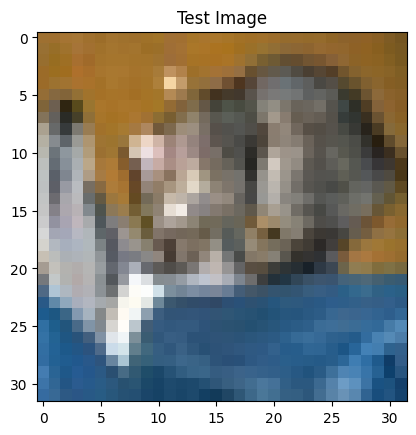

In [1]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize input
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict
predictions = model.predict(test_X)
print("Predicted class for first test image:", np.argmax(predictions[0]))

# Show the first image
plt.imshow(test_X[0])
plt.title("Test Image")
plt.show()



**Model with L1 Regularization**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0961 - loss: 12.7357
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0953 - loss: 2.9205
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0989 - loss: 2.9203
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1005 - loss: 2.9205
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0986 - loss: 2.9203
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0968 - loss: 2.9266
Test loss: 2.9265329837799072
Test accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted class for first test image: 1


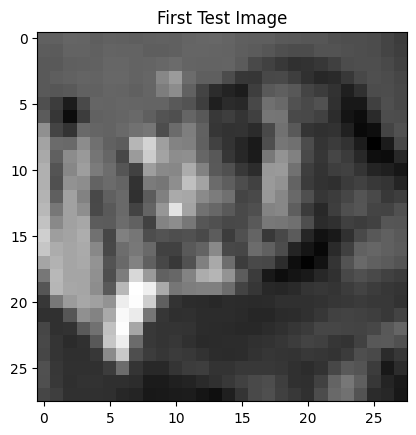

In [2]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l1
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For resizing and grayscale conversion

# Load CIFAR-10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Convert to grayscale and resize to 28x28
def preprocess_images(X):
    X_processed = []
    for img in X:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        resized = cv2.resize(gray, (28, 28))  # Resize to 28x28
        X_processed.append(resized)
    return np.array(X_processed).reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_X = preprocess_images(train_X)
test_X = preprocess_images(test_X)

# One-hot encode labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build model with L1 regularization
model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict
predictions = model.predict(test_X)
print("Predicted class for first test image:", np.argmax(predictions[0]))

# Show the first test image
plt.imshow(test_X[0].reshape(28, 28), cmap='gray')
plt.title("First Test Image")
plt.show()


**Model with L2 Regularization**

In [3]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2  # for image processing

# Load CIFAR-10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Convert RGB to Grayscale and resize to 28x28
def preprocess_images(X):
    X_processed = []
    for img in X:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        resized = cv2.resize(gray, (28, 28))
        X_processed.append(resized)
    return np.array(X_processed).reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_X = preprocess_images(train_X)
test_X = preprocess_images(test_X)

# One-hot encode labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build model with L2 regularization
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(28, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(train_X, train_Y_one_hot, epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.0992 - loss: 2.7311
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0996 - loss: 2.3026
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0985 - loss: 2.3027
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0975 - loss: 2.3027
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0959 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1027 - loss: 2.3026
Test loss: 2.302600860595703
Test accuracy: 0.10000000149011612


**Model with Dropout**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.2187 - loss: 2.0663
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4422 - loss: 1.5592
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5102 - loss: 1.3982
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5479 - loss: 1.2911
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5803 - loss: 1.2123
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5965 - loss: 1.1501
Test loss: 1.1576546430587769
Test accuracy: 0.5946999788284302
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predicted class for first test image: 4


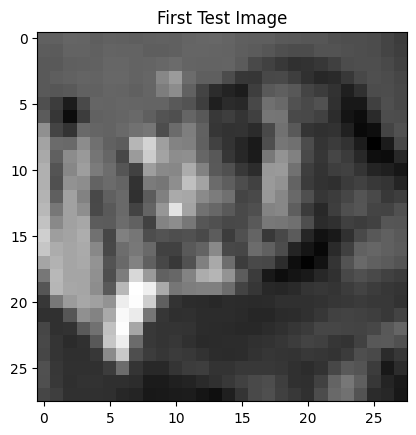

In [4]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For preprocessing

# Load CIFAR-10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Convert to grayscale and resize
def preprocess_images(X):
    X_processed = []
    for img in X:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        resized = cv2.resize(gray, (28, 28))
        X_processed.append(resized)
    return np.array(X_processed).reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_X = preprocess_images(train_X)
test_X = preprocess_images(test_X)

# One-hot encode labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build model with Dropout
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(28, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))  # Higher dropout before final layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and visualize
predictions = model.predict(test_X)
print("Predicted class for first test image:", np.argmax(predictions[0]))
plt.imshow(test_X[0].reshape(28, 28), cmap='gray')
plt.title("First Test Image")
plt.show()


**Model with both L2 (or L1) and Dropout**

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.0992 - loss: 2.7470
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1011 - loss: 2.3027
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.1010 - loss: 2.3027
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0960 - loss: 2.3027
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1011 - loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1027 - loss: 2.3026
Test loss: 2.302610397338867
Test accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted class: 8


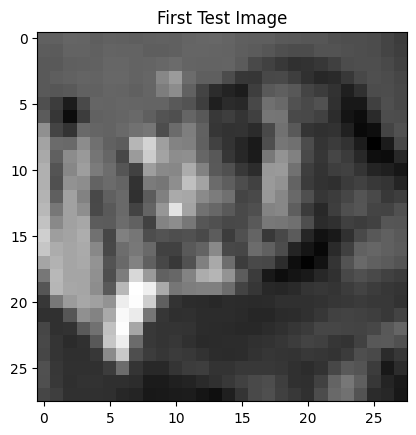

In [5]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Image processing

# Load CIFAR-10
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Preprocess: Convert to grayscale & resize to 28x28
def preprocess_images(X):
    X_processed = []
    for img in X:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        resized = cv2.resize(gray, (28, 28))
        X_processed.append(resized)
    return np.array(X_processed).reshape(-1, 28, 28, 1).astype('float32') / 255.0

train_X = preprocess_images(train_X)
test_X = preprocess_images(test_X)

# One-hot encode
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build model with L2 and Dropout
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Conv2D(28, (3,3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and visualize
predictions = model.predict(test_X)
print("Predicted class:", np.argmax(predictions[0]))
plt.imshow(test_X[0].reshape(28, 28), cmap='gray')
plt.title("First Test Image")
plt.show()
